<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/practice-gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotten Tomatoes: Top 100 Movies of All Time
References:
- [Rotten Tomatoes: Top 100](https://www.rottentomatoes.com/top/bestofrt/)
- [Joel Spolsky: The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!)](https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/)
- [David C. Zentgraf: What Every Programmer Absolutely, Positively Needs To Know About Encodings And Character Sets To Work With Text](https://kunststube.net/encoding/)
- [StackOverflow: What is the difference between a string and a byte string?](https://stackoverflow.com/questions/6224052/what-is-the-difference-between-a-string-and-a-byte-string)
- [StackOverflow: Is file object in python an iterable?](https://stackoverflow.com/questions/16994552/is-file-object-in-python-an-iterable/16994568#16994568)
- [MediaWiki Action API Tutorial](https://www.mediawiki.org/wiki/API:Tutorial)
- [SQLAlchemy](https://www.sqlalchemy.org/)


In [2]:
# Import dependencies
import requests
import zipfile
from bs4 import BeautifulSoup
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

## Flat Files

In [ ]:
path = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ca594d_bestofrt/'
df1 = pd.read_csv(path+'bestofrt.tsv', sep='\t')
df1.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


## HTML Files

In [ ]:
# Download the ZIP archive
zip_path = 'https://github.com/lustraka/Data_Analysis_Workouts/blob/main/Analyse_Twitter_Data/data/rt_html.zip?raw=true'
response = requests.get(zip_path)
with open('rt-html.zip', 'wb') as zip:
  zip.write(response.content)

# Make directory for files
folder = 'rt_html'
os.makedirs(folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile('rt-html.zip', 'r') as myzip:
  myzip.extractall()

In [ ]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
    title = soup.find('title').text[:-len(' - Rotten Tomatoes')].replace(u'\xa0', u' ')
    audience_score = soup.find('div', class_='audience-score meter').find('span').text[:-1]
    soup.find('div', class_='audience-score meter').next_sibling()[2].span.extract()
    num_audience_ratings = soup.find('div', class_='audience-score meter').next_sibling()[2].text
    num_audience_ratings = num_audience_ratings.lstrip().replace(',','')

    # Append to list of dictionaries
    df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df2 = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [ ]:
df2.head()

,title,audience_score,number_of_audience_ratings
0,Selma (2015),86,60533
1,Metropolis (1927),92,62018
2,Baby Driver (2017),89,48114
3,M (1931),95,35778
4,Apocalypse Now (1979),94,284606


In [ ]:
df = df1.merge(df2, on='title')
df.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,1,99,The Wizard of Oz (1939),110,89,874425
1,2,100,Citizen Kane (1941),75,90,157274
2,3,100,The Third Man (1949),77,93,53081
3,4,99,Get Out (2017),282,87,63837
4,5,97,Mad Max: Fury Road (2015),370,86,123937


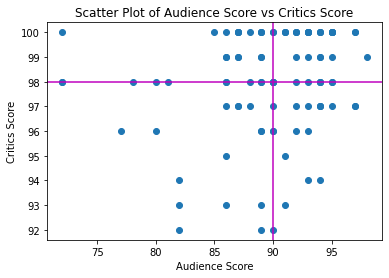

In [ ]:
plt.scatter(df.audience_score, df.critic_score)
plt.title('Scatter Plot of Audience Score vs Critics Score')
plt.xlabel('Audience Score')
plt.ylabel('Critics Score')
plt.axvline(df.audience_score.median(), c='m')
plt.axhline(df.critic_score.median(), c='m')
plt.show()

## Text Files

In [ ]:
# Make directory for files
folder_txt = 'ebert_reviews'
os.makedirs(folder_txt, exist_ok=True)

In [ ]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [ ]:
# Access the content and write to a file
for url in ebert_review_urls:
  response = requests.get(url)
  with open(os.path.join(folder_txt, url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [ ]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        
    # Append to list of dictionaries
    df_list.append({'title': title,
                    'review_url': review_url,
                    'review_text': review_text})
df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])

In [ ]:
df.head()

,title,review_url,review_text
0,Citizen Kane (1941),http://www.rogerebert.com/reviews/great-movie-...,“I don't think any word can explain a man's li...
1,On the Waterfront (1954),http://www.rogerebert.com/reviews/great-movie-...,Conscience. That stuff can drive you nuts.\n\n...
2,Apocalypse Now (1979),http://www.rogerebert.com/reviews/great-movie-...,"Francis Ford Coppola's film ""Apocalypse Now"" w..."
3,Taxi Driver (1976),http://www.rogerebert.com/reviews/great-movie-...,"Are you talkin' to me? Well, I'm the only one ..."
4,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."


## JSON Files

In [3]:
! pip install wptools
import wptools # MediaWiki API library

     |████████████████████████████████| 227 kB 40.0 MB/s 
  Created wheel for pycurl: filename=pycurl-7.44.1-cp37-cp37m-linux_x86_64.whl size=293011 sha256=868f624d779b552216b6330d8f6774218e08e54448b016173b6a7abadddf9113
  Stored in directory: /root/.cache/pip/wheels/c5/46/b4/4dc60b406282c22dd4f1ca7da5c949e88aeadb78283123f94d
Successfully built pycurl


In [9]:
# Set up the name of the page
page = wptools.page('E.T._the_Extra-Terrestrial').get()
# Print the length of the image attribute
print('Number of images on the page', len(page.data['image']))

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (query) E.T. the Extra-Terrestrial (&plcontinue=...
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) P3808|P3129|P1562|P2758|Q229009|Q341421...
www.wikidata.org (labels) P480|P725|P3145|P214|Q101584521|Q105701...
www.wikidata.org (labels) Q93605402|Q505449|Q787131|P2704|P950|Q9...
www.wikidata.org (labels) P3203|P3212|P1712|P58|Q105641628|Q78712...
www.wikidata.org (labels) Q377616|Q230390|Q20644795|P1804|P1981|P...


Number of images on the page 4


en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:ET logo 3.svg|File:E t the extr...
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(123)> P1562, P57, P272, P345, P31, P161, P373, P48...
  description: 1982 film by Steven Spielberg
  exhtml: <str(485)> <p><i><b>E.T. the Extra-Terrestrial</b></i> i...
  exrest: <str(464)> E.T. the Extra-Terrestrial is a 1982 American...
  extext: <str(2188)> _**E.T. the Extra-Terrestrial**_ (also known...
  extract: <str(3387)> <p class="mw-empty-elt"></p><p><i><b>E.T. t...
  image: <list(4)> {'kind': 'parse-image', 'file': 'File:E t the e...
  infobox: <dict(18)> name, image, caption, director, producers, w...
  iwlinks: <list(7)> https://commons.wikimedia.org/wiki/Category:E...
  label: E.T. the Extra-Terrestrial
  labels: <dict(242)> P3808, P3129, P1562, P2758, Q

In [22]:
# Access the first image in the image attribute of page's data
page.data['image'][0]

{'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=7419503',
 'descriptionurl': 'https://en.wikipedia.org/wiki/File:E_t_the_extra_terrestrial_ver3.jpg',
 'file': 'File:E t the extra terrestrial ver3.jpg',
 'height': 394,
 'kind': 'parse-image',
 'metadata': {'Assessments': {'hidden': '',
   'source': 'commons-categories',
   'value': ''},
  'Attribution': {'hidden': '',
   'source': 'commons-desc-page',
   'value': '<p>The poster art can or could be obtained from <a href="//en.wikipedia.org/wiki/John_Alvin" title="John Alvin">John Alvin</a>.\n</p>'},
  'Categories': {'hidden': '',
   'source': 'commons-categories',
   'value': 'All non-free media|E.T. the Extra-Terrestrial|Fair use images of film posters|Files with no machine-readable author|Noindexed pages|Wikipedia non-free files for NFUR review|Wikipedia non-free files with valid backlink'},
  'CommonsMetadataExtension': {'hidden': '',
   'source': 'extension',
   'value': 1.2},
  'Copyrighted': {'hidden': '',
   's

In [26]:
# Access the director key of the inbox attribute
page.data['infobox']['director']

'[[Steven Spielberg]]'

In [27]:
from PIL import Image
from io import BytesIO

In [28]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [29]:
folder_name = 'bestofrt_posters'
# Make directory for images
os.makedirs(folder_name, exist_ok=True)

In [30]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True).get()
        # Access images
        images = page.data['image']
        # First image is usually the poster
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
2
3
3_The_Third_Man: cannot identify image file <_io.BytesIO object at 0x7ffa031c2fb0>
4
5
6
7
7_All_About_Eve: cannot identify image file <_io.BytesIO object at 0x7ffa03196b90>
8
9
10
11
12
13
13_It_Happened_One_Night: cannot identify image file <_io.BytesIO object at 0x7ffa03196dd0>
14
14_Singin'_in_the_Rain: cannot identify image file <_io.BytesIO object at 0x7ffa044484d0>
15
15_Boyhood_(film): 'image'
16
17
18
18_Psycho_(1960_film): cannot identify image file <_io.BytesIO object at 0x7ffa0314d2f0>
19
19_Laura_(1944_film): cannot identify image file <_io.BytesIO object at 0x7ffa02826bf0>
20
21
22
22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


24
24_North_by_Northwest: cannot identify image file <_io.BytesIO object at 0x7ffa03133b30>
25
26
27
27_The_Maltese_Falcon_(1941_film): cannot identify image file <_io.BytesIO object at 0x7ffa028242f0>
28
29
30
31
32
33
34
34_The_Adventures_of_Robin_Hood: cannot identify image file <_io.BytesIO object at 0x7ffa027ebcb0>
35
35_Rashomon: cannot identify image file <_io.BytesIO object at 0x7ffa02860bf0>
36
37
38
39
40
41
42
43
43_Bride_of_Frankenstein: cannot identify image file <_io.BytesIO object at 0x7ffa0317ee30>
44
45
46
47
48
49
50
51
51_The_Treasure_of_the_Sierra_Madre_(film): cannot identify image file <_io.BytesIO object at 0x7ffa03ab5c50>
52
53
53_12_Angry_Men_(1957_film): cannot identify image file <_io.BytesIO object at 0x7ffa0314c290>
54
55
56
56_All_Quiet_on_the_Western_Front_(1930_film): cannot identify image file <_io.BytesIO object at 0x7ffa0317ed10>
57
57_Army_of_Shadows: cannot identify image file <_io.BytesIO object at 0x7ffa028126b0>
58
59
60
60_A_Streetcar_Named_Desi

API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


74
75
76
77
78
79
80
81
82
82_Tokyo_Story: cannot identify image file <_io.BytesIO object at 0x7ffa043e2230>
83
84
85
86
87
88
88_High_Noon: cannot identify image file <_io.BytesIO object at 0x7ffa043e22f0>
89
90
90_On_the_Waterfront: cannot identify image file <_io.BytesIO object at 0x7ffa026e3530>
91
92
93
94
94_The_Grapes_of_Wrath_(film): cannot identify image file <_io.BytesIO object at 0x7ffa031f8d70>
95
96
96_Man_on_Wire: cannot identify image file <_io.BytesIO object at 0x7ffa0317e110>
97
98
99
100
100_Battleship_Potemkin: cannot identify image file <_io.BytesIO object at 0x7ffa031d1830>


In [32]:
for key in image_errors.keys():
    print(key)

3_The_Third_Man
7_All_About_Eve
13_It_Happened_One_Night
14_Singin'_in_the_Rain
15_Boyhood_(film)
18_Psycho_(1960_film)
19_Laura_(1944_film)
22_A_Hard_Day%27s_Night_(film)
24_North_by_Northwest
27_The_Maltese_Falcon_(1941_film)
34_The_Adventures_of_Robin_Hood
35_Rashomon
43_Bride_of_Frankenstein
51_The_Treasure_of_the_Sierra_Madre_(film)
53_12_Angry_Men_(1957_film)
56_All_Quiet_on_the_Western_Front_(1930_film)
57_Army_of_Shadows
60_A_Streetcar_Named_Desire_(1951_film)
61_The_Night_of_the_Hunter_(film)
68_Touch_of_Evil
71_Rebecca_(1940_film)
72_Rosemary%27s_Baby_(film)
82_Tokyo_Story
88_High_Noon
90_On_the_Waterfront
94_The_Grapes_of_Wrath_(film)
96_Man_on_Wire
100_Battleship_Potemkin


In [33]:
len(image_errors)

28

In [31]:
# Create DataFrame from list of dictionaries
df = pd.DataFrame(df_list, columns = ['ranking', 'title', 'poster_url'])
df = df.sort_values('ranking').reset_index(drop=True)
df

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
3,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
4,6,The_Cabinet_of_Dr._Caligari,https://upload.wikimedia.org/wikipedia/en/2/2f...
...,...,...,...
67,93,Harry_Potter_and_the_Deathly_Hallows_–_Part_2,https://upload.wikimedia.org/wikipedia/en/d/df...
68,95,Roman_Holiday,https://upload.wikimedia.org/wikipedia/commons...
69,97,Jaws_(film),https://upload.wikimedia.org/wikipedia/en/e/eb...
70,98,Toy_Story,https://upload.wikimedia.org/wikipedia/en/1/13...


### Relational Databases in Python

In [34]:
# Import dependencies
from sqlalchemy import create_engine

In [35]:
# Create SQLAlchemy Engine and empty bestofrt database
# bestofrt.db will not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///bestofrt.db')

In [36]:
# Store cleaned master DataFrame ('df') in a table called master in bestofrt.db
# bestofrt.db will be visible now in the Jupyter Notebook dashboard
df.to_sql('master', engine, index=False)

In [37]:
# Read database data into a pandas DataFrame
df_gather = pd.read_sql('SELECT * FROM master', engine)
df_gather.head()

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://upload.wikimedia.org/wikipedia/commons...
1,2,Citizen_Kane,https://upload.wikimedia.org/wikipedia/commons...
2,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
3,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
4,6,The_Cabinet_of_Dr._Caligari,https://upload.wikimedia.org/wikipedia/en/2/2f...
